In [67]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
input_file = '/home/fatemeh/projects/mantis/res.out'
df = pd.read_csv(input_file, sep=":", header=None, names=['oneCnt', 'eqClsCnt'])
num_samples = 2582

In [41]:
df = df.sort_values(by='eqClsCnt', ascending=False)
df.head()

,oneCnt,eqClsCnt
1177,2,20424957
1240,3,19626062
1234,4,15986416
1242,1,14577570
1238,5,12530958


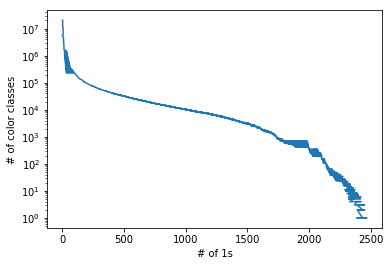

In [43]:
plt.plot(df.oneCnt, df.eqClsCnt)
plt.xlabel('# of 1s')
plt.ylabel('# of color classes')
plt.yscale('log')

In [24]:
psum = 0
cnt = 0
for idx, row in df.iterrows():
    psum += (row[0])*row[1]
    cnt += row[1]
print('total cnt: {} , average # of 1s: {}'.format(cnt, psum/cnt))

total cnt: 222584822 , average # of 1s: 96.21851250037166


In [7]:
input_file = '/mnt/scratch7/pufferfish_data/gencode.v25.pc_transcripts_fixed.fa'
output_file = '/mnt/scratch2/ssbt_experiment/gencode.v25.pc_transcripts_fixed_r1000.txt'
randNum = 1000

lst = []
with open(input_file, 'r') as f:
    for line in f:
        if line[0] == '>':
            txpName = line[1:-2]
        else:
            txpStr = line[:-2]
            lst += [[txpName, txpStr]]

txp_r = random.sample(lst, randNum)
with open(output_file, 'w') as f:
    for l in txp_r:
        f.write('{}\n'.format(l[1]))
        #f.write('>{}\n{}\n'.format(l[0], l[1]))


In [11]:
SSBT_res = '/mnt/scratch2/ssbt_experiment/test.out'
SSBT_res_reformated = '/mnt/scratch2/ssbt_experiment/test.reformated.out'

f = open(SSBT_res, 'r')
cntr = 1
with open(SSBT_res_reformated, 'w') as o:
    for line in f:
        if line[0] == '*':            
            o.write('{}'.format(cntr))
            cntr+=1;
        else:
            o.write(',{}'.format(line.split('/')[-1].split('\n')[0]))    

# drawing the plot for hash-based clustering and distance distribution

In [46]:
input_file = '/home/fatemeh/projects/mantis/hash-clustering-10M.dist'
df = pd.read_csv(input_file, sep=" ", header=None, names=['dist', 'eqClsCnt'])

In [51]:
eqCntSum = df.sum()['eqClsCnt']
print(eqCntSum)
df['perc'] = round(df['eqClsCnt']*100/eqCntSum, 2)

212584822.0


In [52]:
df.sort_values('eqClsCnt', ascending=0).head(20)

,dist,eqClsCnt,perc
6,6,12593239,5.92
7,7,12195733,5.74
5,5,11243410,5.29
8,8,10374140,4.88
4,4,9481032,4.46
9,9,9234326,4.34
10,10,8519779,4.01
11,11,7798690,3.67
12,12,6966548,3.28
3,3,6462090,3.04


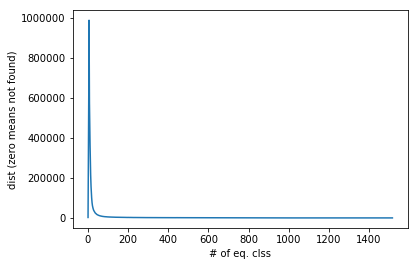

In [13]:
plt.plot(df.dist, df.eqClsCnt)
plt.xlabel('dist (zero means not found)')
plt.ylabel('# of eq. clss')

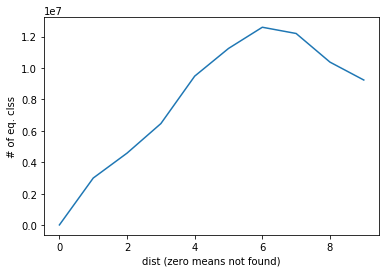

In [49]:
plt.plot(df.dist[:10], df.eqClsCnt[:10])
plt.xlabel('dist (zero means not found)')
plt.ylabel('# of eq. clss')

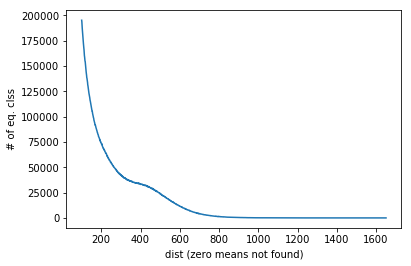

In [50]:
plt.plot(df.dist[100:], df.eqClsCnt[100:])
plt.xlabel('dist (zero means not found)')
plt.ylabel('# of eq. clss')

# Collisions

In [89]:
def collisionStat(file_name):
    df = pd.read_csv(file_name, sep="," )
    #df.info()
    #df.head()
    print(df.head(3))
    print(df.tail(3))
    plt.figure(1)
    plt.subplot(121)
    plt.plot(df['CollisionCnt'], df['BlockCnt'])
    plt.title('All collisions')
    plt.xlabel('Collision Count')
    plt.ylabel('# of Blocks with that many collision')
    plt.subplot(122)
    plt.plot(df['CollisionCnt'][:1000], df['BlockCnt'][:1000])
    plt.title('Collisions up to 1000')
    plt.xlabel('Collision Count')
    plt.ylabel('# of Blocks with that many collision')

## 500k

   CollisionCnt  BlockCnt
0            12         1
1            23         1
2            28         1
       CollisionCnt  BlockCnt
69796        486867         1
69797        487975         1
69798        491849         1


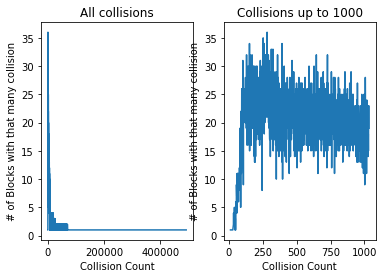

In [90]:
collisionStat('/home/fatemeh/projects/mantis/collisions-500000.dist')

## 1M

   CollisionCnt  BlockCnt
0            16         1
1            29         1
2            38         1
        CollisionCnt  BlockCnt
160484        943559         1
160485        947917         1
160486        949111         1


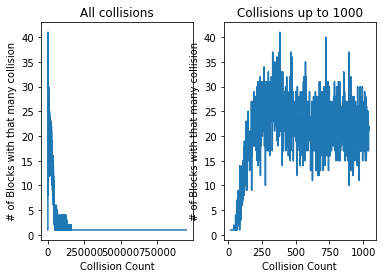

In [91]:
collisionStat('/home/fatemeh/projects/mantis/collisions-1000000.dist')

## 10M

   CollisionCnt  BlockCnt
0            70         1
1            79         2
2            80         1
         CollisionCnt  BlockCnt
2490864       8607971         1
2490865       9271060         1
2490866       9274731         1


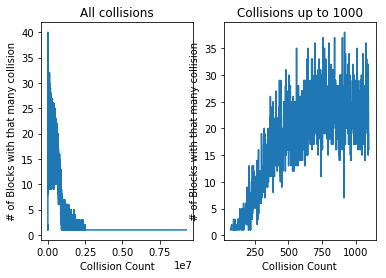

In [92]:
collisionStat('/home/fatemeh/projects/mantis/collisions-10000000.dist')